# Linear Regression on Boston Housing Dataset

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/Boston.csv")

In [ ]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Overview
#### Columns: -
1. crim: Per capita crime rate by town
2. xn: Proportion of residential land zoned for lots over 25,000 sq. ft
3. indus: Proportion of non-retail business acres per town
4. chas: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. nox: Nitric oxide concentration (parts per 10 million)
6. rm: Average number of rooms per dwelling
7. age: Proportion of owner-occupied units built prior to 1940
8. dis: Weighted distances to five Boston employment centers
9. rad: Index of accessibility to radial highways
10. ptratio: Pupil-teacher ratio by town
11. black: 1000(Bk — 0.63)², where Bk is the proportion of [people of African 12. American descent] by town
12. lstat: Percentage of lower status of the population
13. medv: Median value of owner-occupied homes in $1000s

In [ ]:
# remove the 'ID' column
df.drop('ID', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# checking for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

#### No null values found.
---
#### Now, we'll use a HeatMap to perform Multivariate Analysis

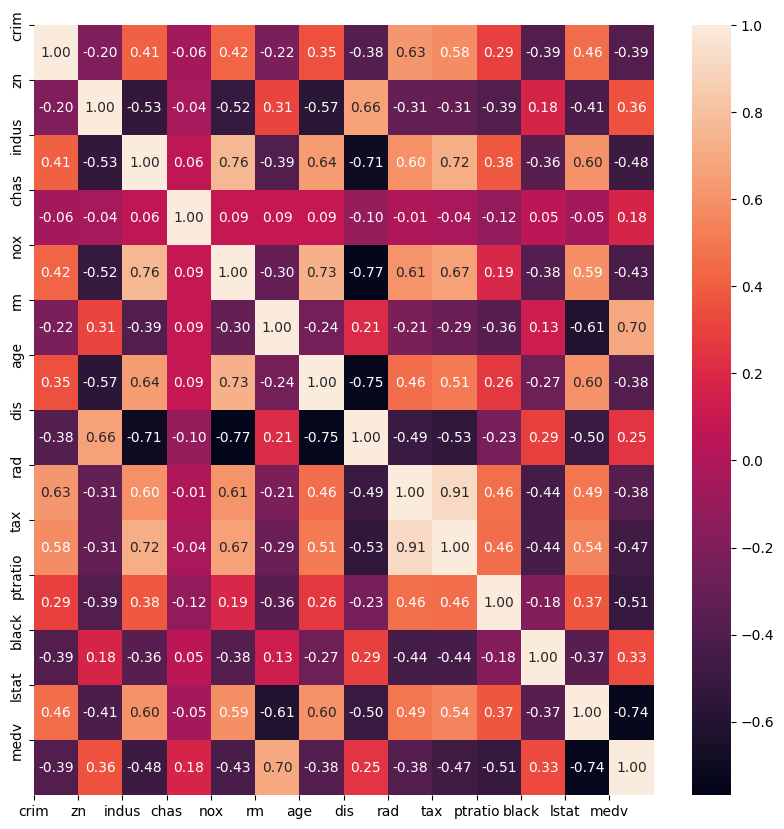

In [ ]:
corr = df.corr()
# figure size
fig, ax = plt.subplots(figsize=(10, 10))
# HeatMap
sns.heatmap(corr, annot = True, cmap = "rocket", fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

## Conclusion: -
1. Using the heatmap we can determine the correlation between different variables.
2. Darker the color == less correlation between 2 columns.
3. Using this information we can plot scatterplots or histograms on specific columns.

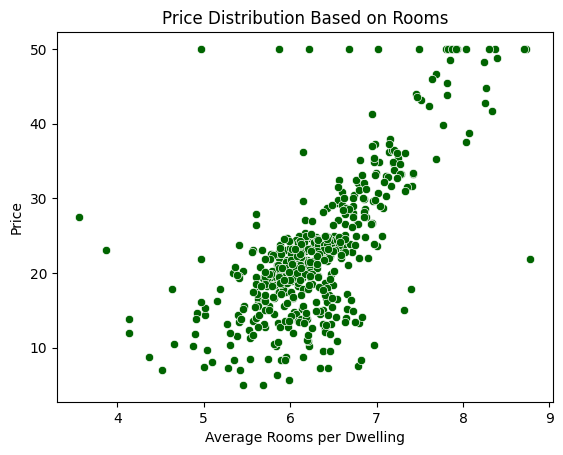

In [ ]:
# scatterplot
sns.scatterplot(data = df, x = "rm", y = "medv", color = "darkgreen")
plt.xlabel("Average Rooms per Dwelling")
plt.ylabel("Price")
plt.title("Price Distribution Based on Rooms")
plt.show()

#### Conclusion: -
1. Highest concentration is for--> rm between 5-7 and price between $10K-30K.
2. There are some outliers.

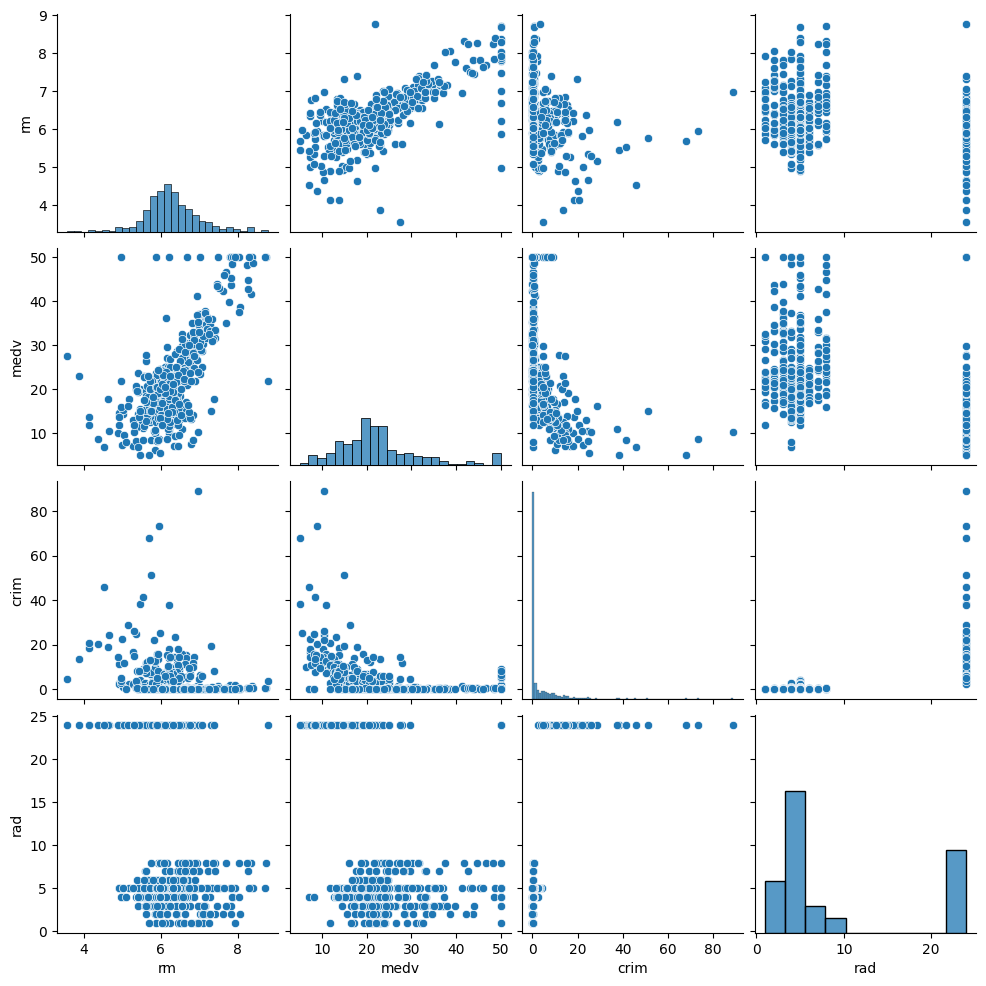

In [ ]:
# pairplots
sns.pairplot(df, vars = ['rm', 'medv', 'crim', 'rad'])
plt.show()

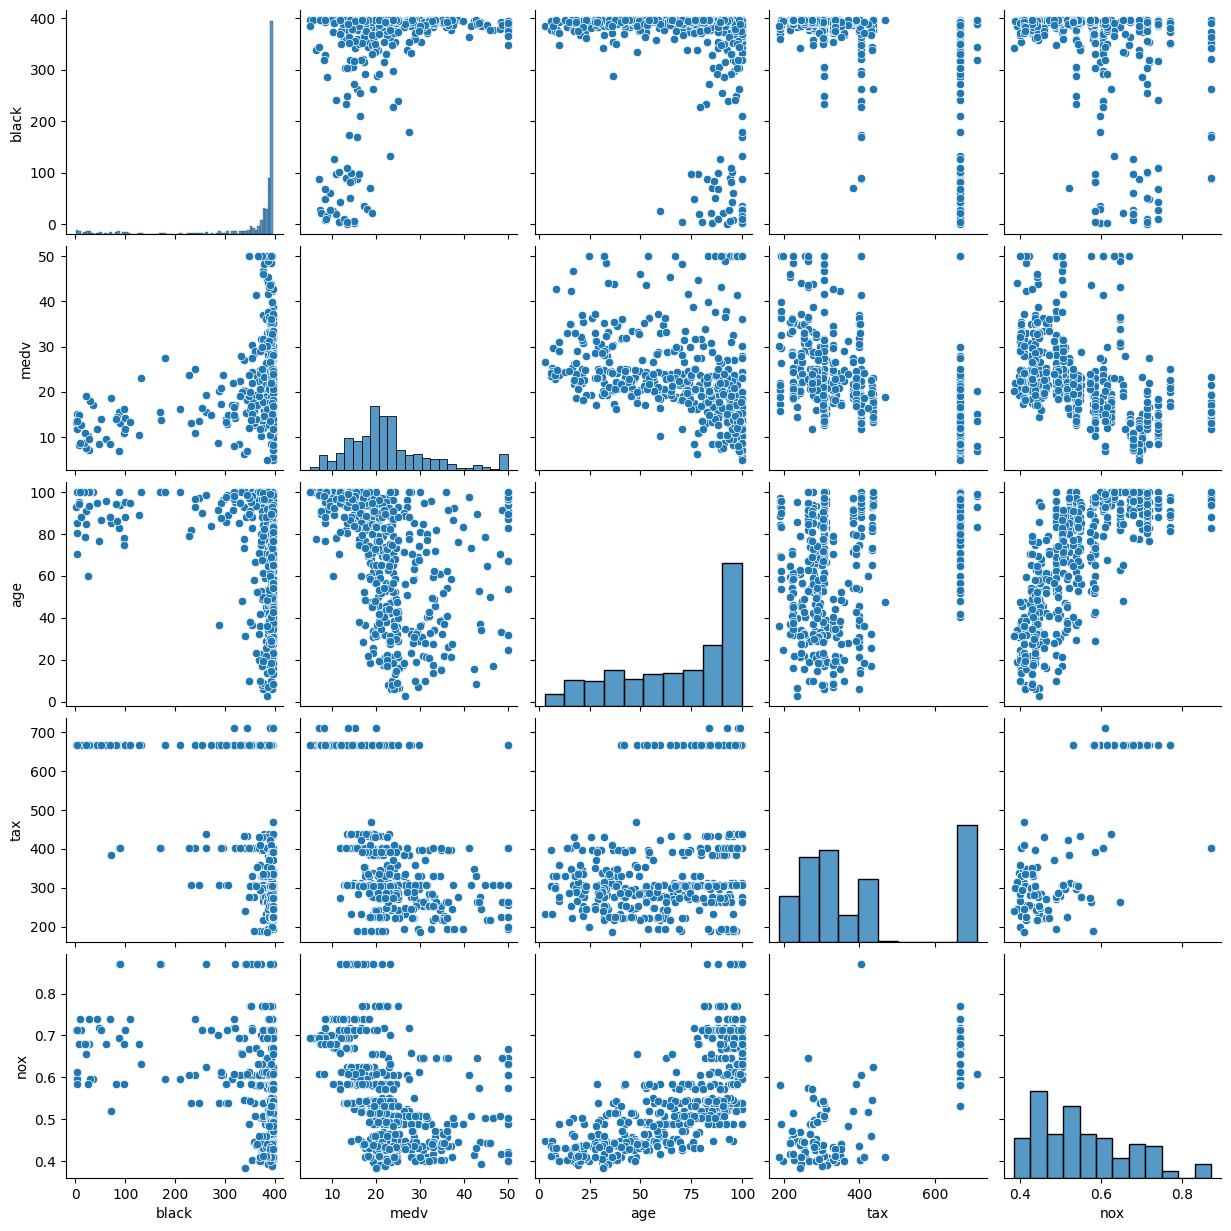

In [ ]:
sns.pairplot(df, vars = ['black', 'medv', 'age', 'tax', 'nox'])
plt.show()

---
# Linear Regression

In [ ]:
# import models from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# setting up values
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]
y = df['medv']

In [ ]:
# Splitting the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (404, 13)
Shape of X_test:  (102, 13)
Shape of y_train:  (404,)
Shape of y_test (102,)


In [ ]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = reg.predict(X_test)

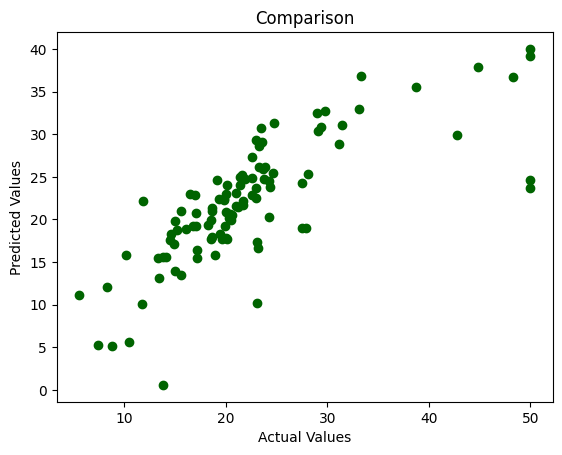

In [ ]:
plt.scatter(y_test, predictions, color = "darkgreen")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Comparison")
plt.show()

### Conclusion: -
- We can see a rough straight line.
- Predicted and actual values are close to each other.
- There is no huge difference between them.

In [ ]:
# Find R2_Score, MSE and RMSE
# Import
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Calculate
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared = False)
# Print the results
print("R2 Score is: ", r2)
print("MSE is: ", mse)
print("RMSE is: ", rmse)

R2 Score is:  0.5892223849182525
MSE is:  33.44897999767639
RMSE is:  5.783509315085123


#### Conclusion: -
1. R2 Score is pretty low  :(
2. MSE is high, I thought it'll be around 15-25.
3. RMSE is alright.
---
This is my first time implementing Linear Regression, so I think overall I'm satisfied with the results.

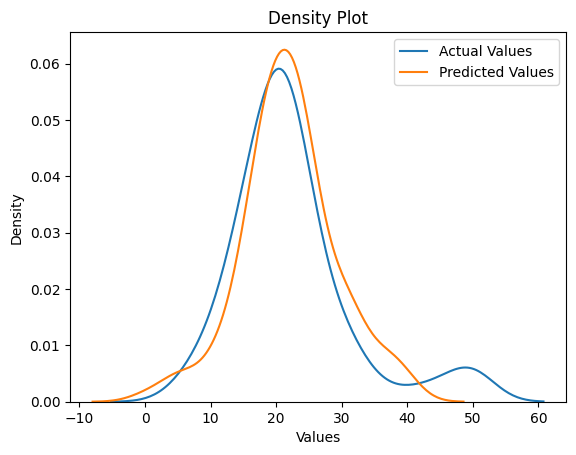

In [37]:
sns.kdeplot(y_test, label='Actual Values')
sns.kdeplot(predictions, label='Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot')
plt.legend()
plt.show()

#### As we can see there is small difference between actual & predicted values.
---
### **Thank You for making it till the end.**